In [4]:
print('%s,  Ejemplo de la funcion format' %("FisicaComputacional")) #%s, d,f
print ("{}, Ejemplo de la funcion format."
                        .format("FisicaComputacional")) 
  
str = "Esta clase es en {}"
print (str.format("Python")) 
  
#b binario, c caracter, d decimal, f flotante, e exponencial, g general (escoge Python el mejor formato)
print("{0:b},{0:c},{0:d},{0:f},{0:e},{0:g}".format(91))

FisicaComputacional,  Ejemplo de la funcion format
FisicaComputacional, Ejemplo de la funcion format.
Esta clase es en Python
1011011,[,91,91.000000,9.100000e+01,91


# Continuación de Raíces

In [5]:
# matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Método del Secante

En el método de Newton aproximamos $f(x)$ por la recta secante (que corta a la función en dos puntos).

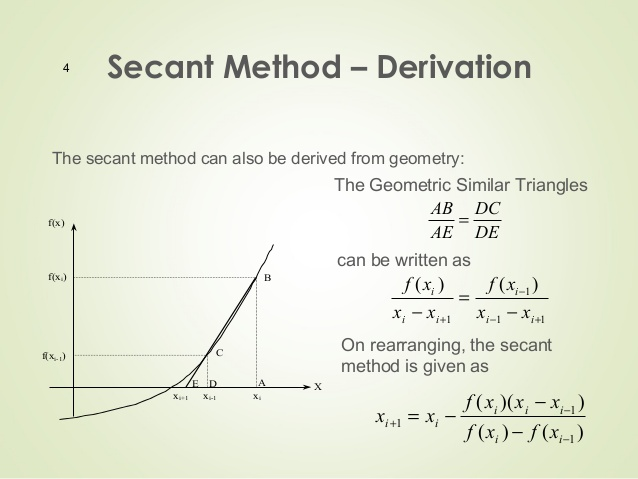

In [6]:
from IPython.display import Image
Image("secante_2.jpg")

Iremos iterando el proceso hasta encontrar la raíz ($x_n$ --> $\alpha$). 

Otra forma de obtener el método, es tomar la interpolación líneal de la forma $$ q(x) = a_0 + a_1 x, $$ para lo cual se necesitan dos estimaciones de $x_0$ y $x_1$ para $\alpha$. Con las condiciones 
$$ q(x_0) = f(x_0), \qquad q(x_1) = f(x_1) $$
Esta función también se llama *secante* de $f$ y es de la forma
$$ q(x) = \frac{(x_1 - x) f(x_0) + (x - x_0) f(x_1)}{x_1 - x_0}$$

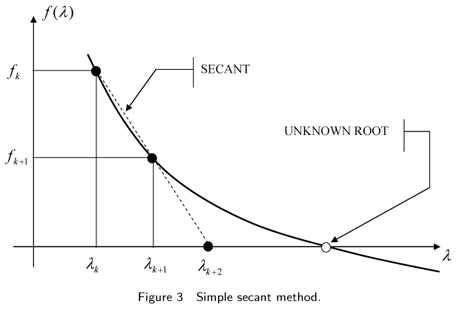

In [8]:
from IPython.display import Image
Image("secante.jpg")

Siguiente paso:

Tenemos que encontrar la solución para
$$ 0 = q(x_2) = \frac{(x_1 - x_2) f(x_0) + (x_2 - x_0) f(x_1)}{x_1 - x_0} $$
El numerador será cero, tal que:
$$ x_2 = \frac{f(x_1) x_0 - f(x_0) x_1}{f(x_1) - f(x_0)} $$

Esta expresión puede presentar una perdida de precisión, (división de números muy pequeños). Es mejor (computacionalmente) hacer el álgebra y expresar el método de la siguiente forma: 
$$ x_2 = x_1 - f(x_1) \left(\frac{f(x_1) - f(x_0)}{x_1 - x_0}\right)^{-1} $$
Iterando n-veces:
$$ 
x_{n+1} = x_n - f(x_n) \left(\frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}}\right)^{-1}, \qquad
  n = 1, 2, 3, \dots    
$$

Buscamos la raiz de $f(x) = x^6 - x - 1$ con los estimados iniciales $x_0 = 2$ y $x_1 = 1$.

In [3]:
def f(x):
    return x**6 - x - 1

In [6]:
def secante(f, x0, x1, delta=1e-9):
    f0 = f(x0)
    f1 = f(x1)
    res = [[x0, f(x0), np.nan], #nan es el paso inicial del Data Frame
           [x1, f(x1), x1 - x0],]
    while True: 
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0) #secante
        f2 = f(x2)
        res.append([x2, f2, x2-x1])
        if abs(f2) < delta:
            break
        f0 = f1
        f1 = f2
        x0 = x1
        x1 = x2
    return res

In [7]:
res = secante(f, 2, 1)
pd.set_option("precision", 15)
pd.DataFrame(res, index=range(len(res)), 
                  columns=["$x_n$", "$f(x_n)$", "$x_n - x_{n-1}$"])

,$x_n$,$f(x_n)$,$x_n - x_{n-1}$
0,2.000000000000000,61.000000000000000,NaN
1,1.000000000000000,-1.000000000000000,-1.000000000000000
2,1.016129032258065,-0.915367713820643,0.016129032258065
3,1.190577768676637,0.657465696717507,0.174448736418573
4,1.117655830941552,-0.168491167838804,-0.072921937735086
5,1.132531550216133,-0.022437286187950,0.014875719274581
6,1.134816808004853,0.000953564064100,0.002285257788720
7,1.134723645948705,-0.000005066165712,-0.000093162056148
8,1.134724138291216,-0.000000001134763,0.000000492342511
9,1.134724138401520,0.000000000000002,0.000000000110304


Converge más lento que Newton, pero no necesitamos conocer la derivada $f'(x)$.


### Otra deducción del método de la secante

Puede verse como una aproximación al método de Newton,
$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$
sustituimos la definición de la derivada.
$$ f'(x_n) \approx \frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}} $$

## Estimación del error

Usamos la expansión de Taylor cerca de $x = x_n$ para calcular $f(\alpha)$.
\begin{align}
0 &= f(\alpha)\\
  &= f(x_n) + (\alpha - x_n) f'(x_n) + \frac{1}{2} (\alpha - x_n)^2 f''(\xi_n)\\
\end{align}
con $\xi_n$ entre $\alpha$ y $x_n$. Dividimos por $f'(x_n)$ para obtener:
$$ 0 = \frac{f(x_n)}{f'(x_n)} + \alpha - x_n + (\alpha - x_n)^2 \frac{f''(\xi_n)}{2 f'(x_n)} $$
Donde volvemos a obtener el método de la secante 
$$ \frac{f(x_n)}{f'(x_n)} - x_n = - x_{n+1} $$
Con un error (que es lo que desprecimos)
$$ \alpha - x_{n+1} = -\frac{f''(\xi)}{2 f'(x_n)} (\alpha - x_n) ^2 $$


## Análisis de Convergencia

Extendiendo la serie a infinito $\lim_{n \to \infty} x_{n+1}=\alpha$, por lo que: 
$$ 
\lim_{n \to \infty} \frac{|\alpha - x_{n+1}|}{|\alpha - x_n|^r} 
  = \left| \frac{f''(\alpha)}{2 f'(\alpha)} \right|^{r-1}
  \equiv c
$$
con $r = 1/2 (1+\sqrt{5}) \approx 1.62$. Para que se cumple hay que suponer que $x_0$ y $x_1$ están suficientemente cerca a $\alpha$. También hay que requere que $f$ tiene dos derivadas continuas en un intervalo alrededor de $\alpha$. 

Nos dice sobre el error de $x_n$
$$ |\alpha - x_{n+1}| \approx c |\alpha - x_n|^r $$

Se parece mucho al caso del metodo de Newton con
$$ \alpha - x_{n+1} \approx M\,(\alpha - x_n)^2, \qquad M = - \frac{f''(\alpha)}{2f'(\alpha)} $$

Ambos metodos tienen convergencia más rápida que lineal, se llaman *metodos superlineales*.

Para $x_n$ cerca de $\alpha$ tenemos $c_n$ cerca de $\alpha$.
$$ \alpha - x_{n+1} \approx = -\frac{f''(\alpha)}{2f'(\alpha)} (\alpha - x_n)^2 $$
Eso nos dice que el metodo de Newton tiene *convergencia cuadrática* con las condiciones
1. $f'(\alpha) \not= 0$
2. $f$ puede diferenciarse dos veces en la vecindad de $\alpha$.

In [8]:
f=lambda x: x**3-10*x**2+5
df=lambda x: 3*x**2-20*x
print(secante(f,0,0.8))

[[0, 5, nan], [0.8, -0.8880000000000008, 0.8], [0.6793478260869564, 0.6983934836545584, -0.12065217391304361], [0.732463709956771, 0.027938177034098288, 0.053115883869814584], [0.7346770729538628, -0.0009617701231894316, 0.002213362997091739], [0.7346034137741144, 1.229073959940763e-06, -7.365917974833103e-05], [0.734603507785179, 5.39168709678961e-11, 9.401106459971942e-08]]


In [9]:
import numpy as np
def secante(f, x0, x1, n=1000):
    f0 = f(x0)
    f1 = f(x1)
    res = [[x0, f(x0), np.nan],
           [x1, f(x1), x1 - x0],]
    delta=1/float(n)
    while True:
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        f2 = f(x2)
        res.append([x2, f2, x2-x1])
        if abs(f2) < delta:
            break
        f0 = f1
        f1 = f2
        x0 = x1
        x1 = x2
    return res

In [10]:
import pandas as pd
f=lambda x: x**3-10*x**2+5
df=lambda x: 3*x**2-20*x
res = secante(f,0,0.8,1000)
pd.set_option("precision", 15)
pd.DataFrame(res, index=range(len(res)), 
                  columns=["$x_n$", "$f(x_n)$", "$x_n - x_{n-1}$"])

,$x_n$,$f(x_n)$,$x_n - x_{n-1}$
0,0.000000000000000,5.000000000000000,NaN
1,0.800000000000000,-0.888000000000001,0.800000000000000
2,0.679347826086956,0.698393483654558,-0.120652173913044
3,0.732463709956771,0.027938177034098,0.053115883869815
4,0.734677072953863,-0.000961770123189,0.002213362997092


## Comparación de costo computacional entre Newton y Secante

Para el método de Newton tenemos
$$ x_{n+1} = x_n + \frac{f(x_n)}{f'(x_n)} $$
Para cada itereación  hay que **evaluar dos funciones** ($f(x_n)$ y $f'(x_n)$), es decir

En el metodo del secante tenemos 
$$ 
x_{n+1} = x_n - f(x_n) \left(\frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}}\right)^{-1}
$$
que requiere solamente la evaluación de $f(x_n)$, guardamos $f(x_{n-1})$ de la iteración anterior. Entonces require solmante **una evaluación de una función** por iteración.

Por eso es muchas veces más rápido utilizar el metodo del secante, aún que requiere más iteraciónes, que el metodo de Newton.

## Ventajas y desventajas

### Ventajas

1. Convergencia superlineal.
2. No requiere el uso de la derivada.
3. Solamente requiere una evaluación de la función por iteración.

### Desventajas

1. No siempre converge.
2. No hay limite garantizado para el error.
3. Tipicamente tiene problemas cuando $f'(\alpha) = 0$.
4. El metodo de Newton se generaliza más fácilmente a sistemas de ecuaciones no-lineales.